---

Hunter Carroll 
---

Machine Learning Programming Homework 5
---

---

In [1]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import uniform
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import scipy.io
import matplotlib.pyplot as plt
import matplotlib as mpl

<font color = 'blue'>Problem 1</font>
---

The dataset faces.mat contains a dataset of images, each $32\times 32$ in grayscale. We will perform PCA on this dataset.

1. Load the data use scipy.io.loadmat. Get the feature matrix. Each row of the feature matrix is an image. Plot the first 100 images, using subplot to make a 10 by 10 image matrix. Do you see some familiar faces? (Hint: recall how we plot images for the MNIST dataset. Use cmap=mpl.cm.gist_gray. If you see the image is rotated, set the "order" variable when you reshape the data. Also make the figure bigger if needed use rcParams as we did before.) 

2. Scale the feature matrix first. Perform a PCA for the scaled feature matrix to get all of the principal components. Plot the first 36 principal components in a 6 by 6 image matrix.

3. To have $95\%$ of the variance explained, what is the minimum number of principal components that are needed?

4. Build a PCA with 100 principal components. Project the data to the 100 principal components and perform an inverse transform back to the original dimension. Plot the first 100 images (10 by 10 image matrix) using the scaled feature matrix, and then plot the first 100 images using the recovered data. What do you see?

---

<font color = 'blue'>1. Load the data use `scipy.io.loadmat`. Get the feature matrix. Each row of the feature matrix is an image. Plot the first 100 images, using subplot to make a `10x10` image matrix. Do you see some familiar faces? (Hint: Recall how we plot images for the MNIST dataset. Use `cmap = mpl.cm.dist_gray`. If you see the image is rotated, set the `order` variable when you reshape the data. Also make the figure bigger if needed using `rcParams` as did before. )</font >
---


---

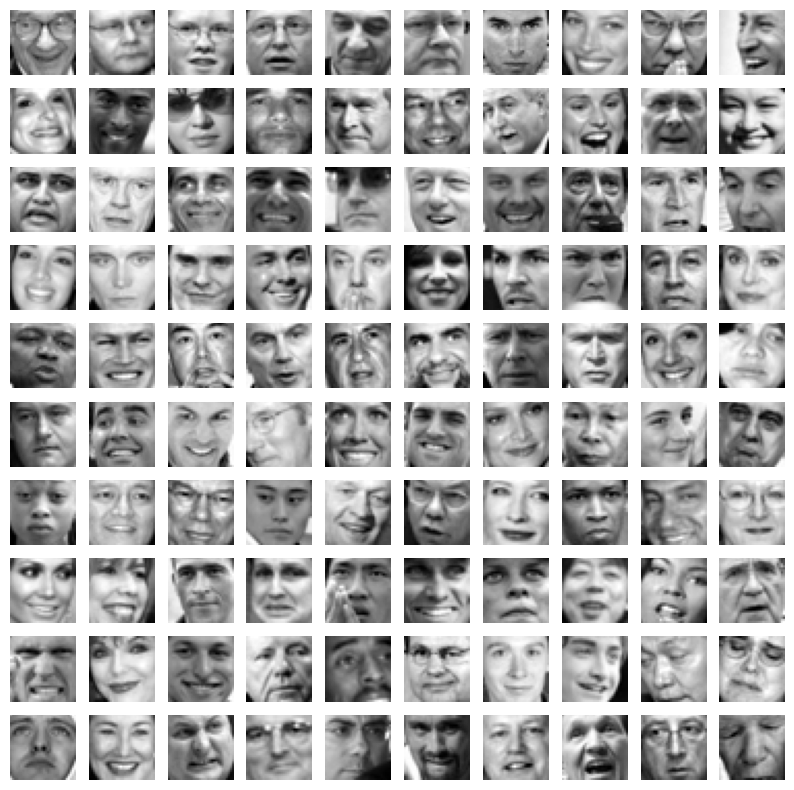

In [2]:
# Use rcParams to set figsize for our images displayed below
plt.rcParams['figure.figsize'] = [10, 10]

# Load the data
file_path = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/ProgrammingHomework/Homework5Programming/faces.mat'
data = scipy.io.loadmat(file_path)
feature_matrix = data['X']

# Use subplot to make 10x10 image matrix 
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

# Plot the first 100 images 
for i in range(100):
    row = i // 10  # row position for the subplot by integer division
    col = i % 10 # column position for the subplot by modulo operation. modulo 10**
    img = np.reshape(feature_matrix[i, :], (32, 32), order='F') # Reshape 32 x 32 
    axes[row, col].imshow(img, cmap=mpl.cm.gist_gray) # in grayscale
    axes[row, col].axis('off') # Turn off axis otherwise it crowds the images below 

plt.show()

---

<font color = 'blue'>2. Scale the feature matrix first. Perform a PCA for the scaled feature matrix to get all of the principal components. Plot the first 36 principal components in a 6 by 6 image matrix.</font>
---

---

In [3]:
feature_matrix.shape # Our components for PCA will be the columns

(5000, 1024)

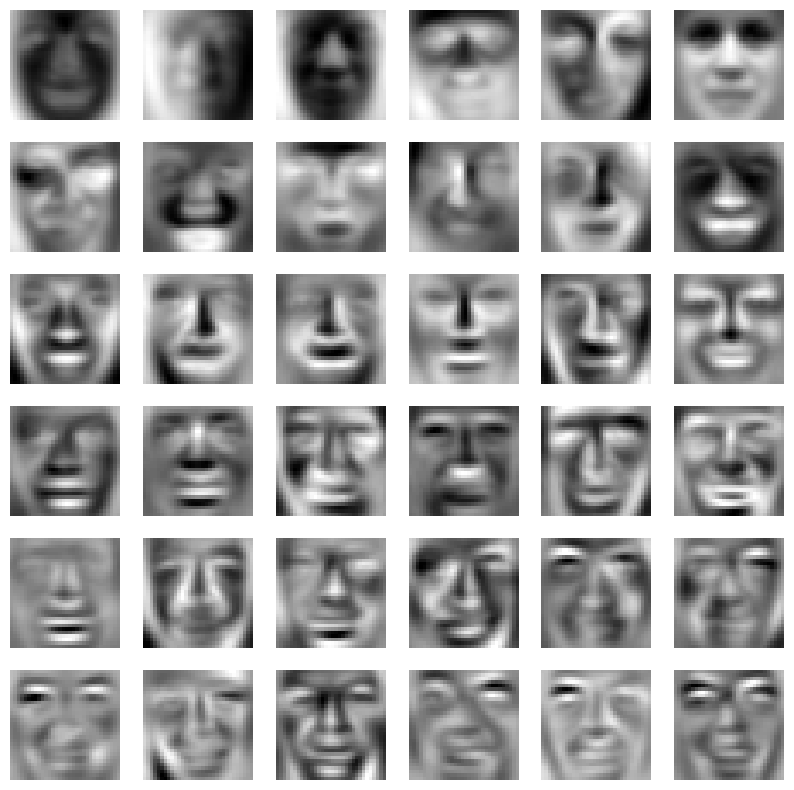

In [4]:
# Scale the feature matrix using fit_transform,
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)

# Perform PCA with n_components = columns of feature matrix
pca = PCA(n_components=feature_matrix.shape[1]) 
pca.fit(feature_matrix_scaled) 

# Using the same plotting method above for 6 rows and 6 columns with each figure being a 10x10
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(10, 10))

for i in range(36):
    row = i // 6 
    col = i % 6
    img = np.reshape(pca.components_[i, :], (32, 32), order='F') 
    axes[row, col].imshow(img, cmap=mpl.cm.gist_gray)
    axes[row, col].axis('off')

plt.show()

---

<font color = 'blue'>3. To have $95\%$ of the variance explained, what is the minimum number of principal components that are needed?</font>
---

---

In [5]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('=='*50)
print(f'PCA can compress the dataset to dimension{d}, while preseving 95% of the variance.')
print('=='*50)

PCA can compress the dataset to dimension130, while preseving 95% of the variance.


---

<font color = 'blue'>4. Build a PCA with 100 principal components. Project the data to the 100 principal components and perform an inverse transform back to the original dimension. Plot the first 100 images (10 by 10 image matrix) using the scaled feature matrix, and then plot the first 100 images using the recovered data. What do you see?
---

---

In [6]:
# Getting intuition, 

pca_100 = PCA(n_components=100)
X_reduced = pca_100.fit_transform(feature_matrix)
X_recovered = pca_100.inverse_transform(X_reduced)
print(X_reduced.shape)
print(X_recovered.shape)

(5000, 100)
(5000, 1024)


Original Scaled Images


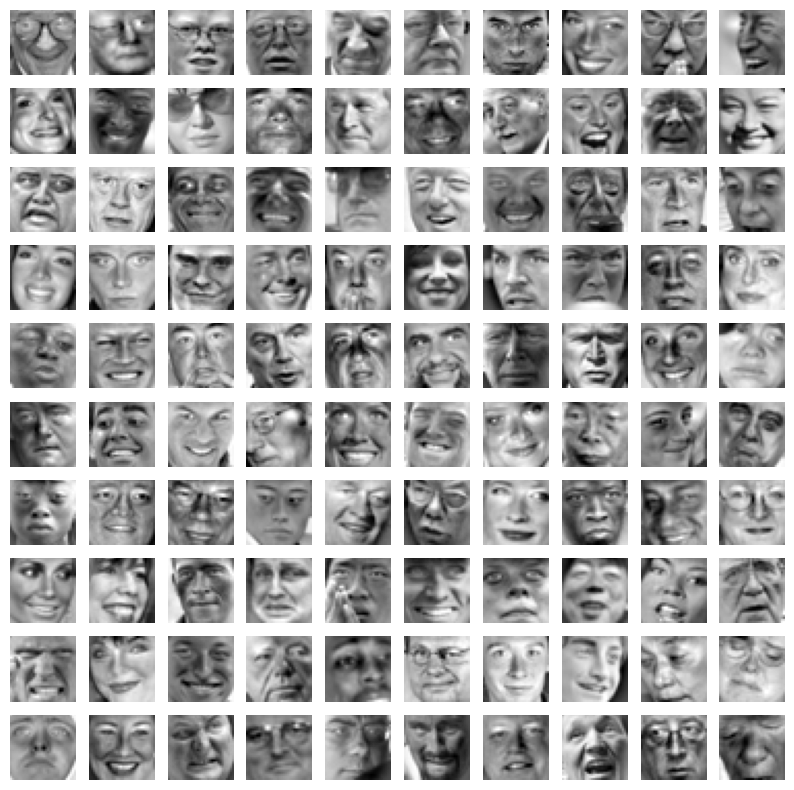

Recovered Images - PCA Inverse Transform


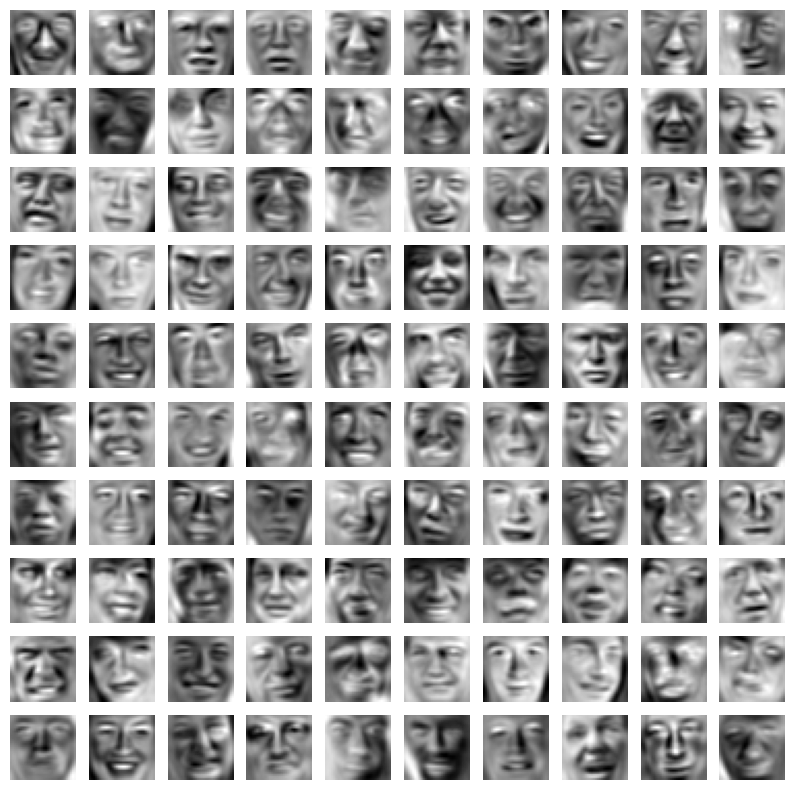

In [7]:
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)

pca_100 = PCA(n_components=100)
pca_100.fit(feature_matrix_scaled)

feature_matrix_projected = pca_100.transform(feature_matrix_scaled)
feature_matrix_recovered = pca_100.inverse_transform(feature_matrix_projected)

def PLOT(data, nrows, ncols, cmap): # Inputs ->  Data -> nrows considered -> ncols considered -> cmap (grayscale)
    # Set out subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    # Implementation of our plotting function above
    for i in range(nrows*ncols):
        row = i // ncols
        col = i % ncols
        img = data[i].reshape((32, 32), order='F')
        axes[row, col].imshow(img, cmap=cmap)
        axes[row, col].axis('off')
    plt.show()

print("Original Scaled Images")
PLOT(feature_matrix_scaled, 10, 10, mpl.cm.gist_gray)

print("Recovered Images - PCA Inverse Transform")
PLOT(feature_matrix_recovered, 10, 10, mpl.cm.gist_gray)

---

<font color = 'blue'> What do you see? </font>
---

---

It is noticeable that our recovered images are blurry after dimensionality reduction. However, the general structure is maintained but precision in detail has decreased. What we can take away from this: PCA will keep the general structure, or the most important features which in turn results in a loss of information (the fine details) in the process and this is clearly visible in the scaled and recovered images displayed above.(PCA retains the features that contribute the most to data variance) 

---

<font color = 'blue'>Problem 2</font>
---

Revisit Problem 2 HW 3. Read in the dataset stored in 'HW3P2.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

(a) Try a Support Vector Machine classifier (sklearn.svm.SVC), with various hyperparameters: kernel="linear", C in the range of 1 and 100 with 50 equidistant points; and kernel="rbf", C in the range of 1 and 100 with 50 equidistant points, and gamma in the range of 0.0001 and 2 with 50 equidistant points. Show the best parameters and best mean test score. In SVC, set random_state to 10.

(b) Make a decision boundary plot with the best parameters from (a)

(c) Use a randomized search to repeat Part (a), but use 1000 randomly chosen parameter combinations

(d) Compare the best mean test scores in (a) and (c). Are they close or very different?

---

<font color = 'red'>NOTE: I USED COMBINED PARAMETER GRIDS AND SEPARATE PARAMETER GRIDS FOR BOTH PART A AND PART C IN ORDER TO SEE HOW THE LINEAR KERNEL PERFORMS AGAINST THE RBF KERNEL BUT THE ANSWERS STAY THE SAME.</font>
---

<font color = 'blue'>(a) Try a Support Vector Machine classifier (sklearn.svm.SVC), with various hyperparameters: kernel="linear", C in the range of 1 and 100 with 50 equidistant points; and kernel="rbf", C in the range of 1 and 100 with 50 equidistant points, and gamma in the range of 0.0001 and 2 with 50 equidistant points. Show the best parameters and best mean test score. In SVC, set random_state to 10.</font>
---

---

In [8]:
# Load in the data,
file_path2 = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/ProgrammingHomework/Homework3Programming/HW3P2.txt'
HW3P2 = pd.read_csv(file_path2, sep=' ', header=None)
HW3P2_columns = ['Feature1', 'Feature2', 'Label']
HW3P2.columns = HW3P2_columns 

# Define features and labels, 
X = HW3P2[['Feature1', 'Feature2']].values
y = HW3P2['Label'].values

#Print head for our data
HW3P2.head()

,Feature1,Feature2,Label
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


---

<font color = 'blue'>Combined Parameter Grid </font>
---

---

In [9]:
combined_param_grid = [
    {'svm__kernel': ['linear'], 'svm__C': np.linspace(1, 100, 50)},
    {'svm__kernel': ['rbf'], 'svm__C': np.linspace(1, 100, 50), 'svm__gamma': np.linspace(0.0001, 2, 50)}
]

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(random_state=10))  
])

combined_grid_search = GridSearchCV(
    pipeline,
    combined_param_grid,
    cv=10,
    scoring='accuracy',
    verbose=1
)

combined_grid_search.fit(X, y)

print('=='*60)
print("Combined Grid Search: Best parameters found:", combined_grid_search.best_params_)
print("Combined Grid Search: Best mean test score:", combined_grid_search.best_score_)
print('=='*60)

Fitting 10 folds for each of 2550 candidates, totalling 25500 fits
Combined Grid Search: Best parameters found: {'svm__C': 53.53061224489795, 'svm__gamma': 1.1020857142857143, 'svm__kernel': 'rbf'}
Combined Grid Search: Best mean test score: 0.9256348569901096


---

<font color ='blue' >Individual Parameter Grids</font>
---

---

In [10]:
## This code cell is for plotting purposes down below so the contour can be plotted with both linear and rbf

linear_param_grid = {
    'svm__kernel': ['linear'], 
    'svm__C': np.linspace(1, 100, 50)
}
rbf_param_grid = {
    'svm__kernel': ['rbf'], 
    'svm__C': np.linspace(1, 100, 50),
    'svm__gamma': np.linspace(0.0001, 2, 50)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(random_state=10))  
])

linear_grid_search = GridSearchCV(pipeline, linear_param_grid, cv=10, scoring='accuracy', verbose=1)
rbf_grid_search = GridSearchCV(pipeline, rbf_param_grid, cv=10, scoring='accuracy', verbose=1)
linear_grid_search.fit(X, y)
rbf_grid_search.fit(X, y)
print('=='*60)
print("Linear: Best parameters:", linear_grid_search.best_params_)
print("Linear: Best mean test score Grid Search CV:", linear_grid_search.best_score_)
print('=='*60)
print("RBF: Best parameters:", rbf_grid_search.best_params_)
print("RBF: Best mean test score Grid Search CV:", rbf_grid_search.best_score_)
print('=='*60)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 2500 candidates, totalling 25000 fits
Linear: Best parameters: {'svm__C': 5.040816326530612, 'svm__kernel': 'linear'}
Linear: Best mean test score Grid Search CV: 0.4839481422079658
RBF: Best parameters: {'svm__C': 53.53061224489795, 'svm__gamma': 1.1020857142857143, 'svm__kernel': 'rbf'}
RBF: Best mean test score Grid Search CV: 0.9256348569901096


---

<font color = 'blue'>(b) Make a decision boundary plot with the best parameters from (a)</font>
---

---

In [11]:
# Our best models,
best_model_linear = linear_grid_search.best_estimator_
best_model_rbf = rbf_grid_search.best_estimator_

# Generate grid
x1 = np.linspace(0, 1.01, 400)
x2 = np.linspace(0.35, 1.01, 400)
X1, X2 = np.meshgrid(x1, x2)
r1, r2 = X1.flatten(), X2.flatten()
grid = np.hstack((r1.reshape(-1, 1), r2.reshape(-1, 1)))

---

<font color = 'blue'>Linear Kernel Decision Boundary</font>
---

---

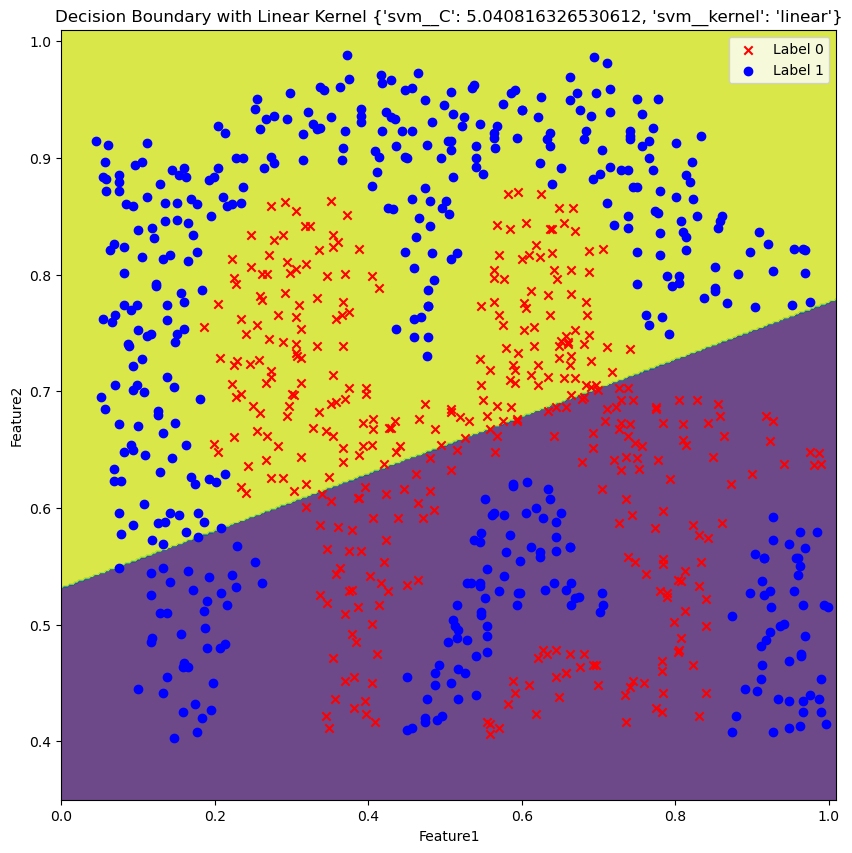

In [12]:
best_model_linear.fit(X, y)
yhat_linear = best_model_linear.predict(grid)
ZZ_linear = yhat_linear.reshape(X1.shape)

# Plotting for the RBF model
plt.contourf(X1, X2, ZZ_linear, alpha=0.8)
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', c='r', label='Label 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', c='b', label='Label 1')
plt.title(f'Decision Boundary with Linear Kernel {linear_grid_search.best_params_}')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

---

<font color = 'blue'>RBF Kernel Decision Boundary</font>
---

---

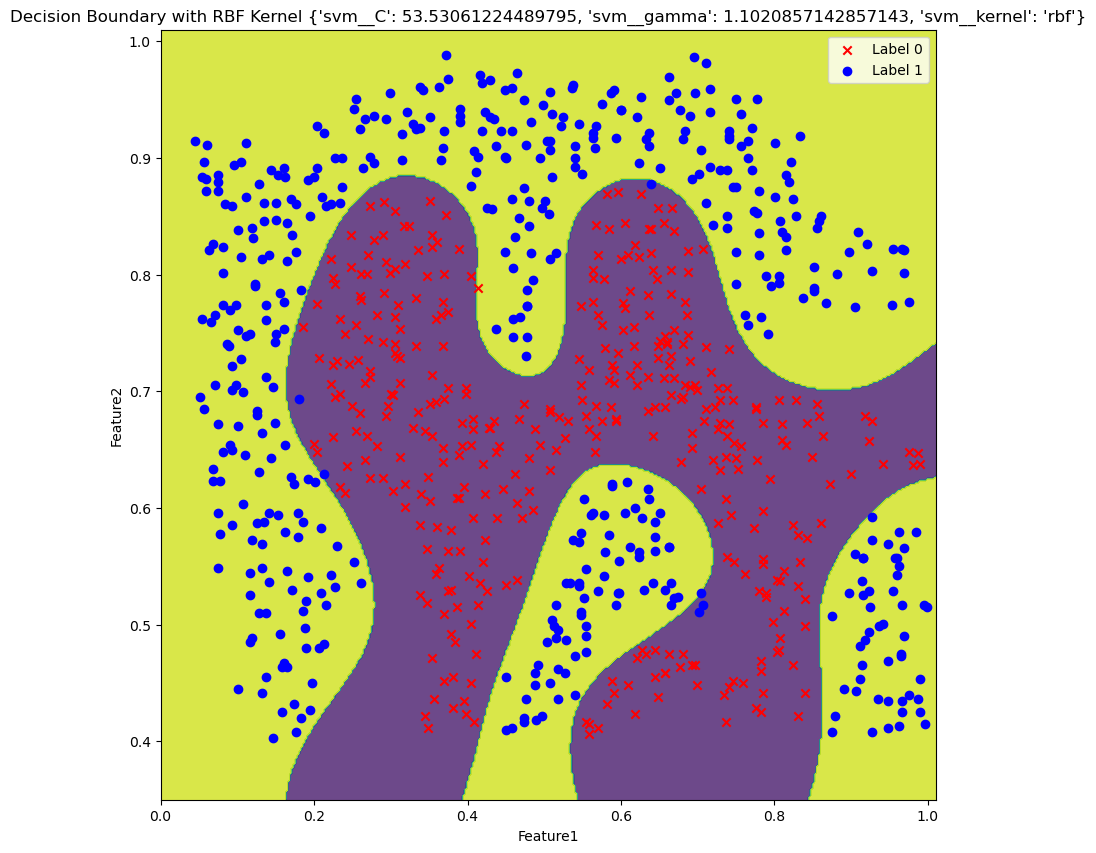

In [13]:
best_model_rbf.fit(X, y)
yhat_rbf = best_model_rbf.predict(grid)
ZZ_rbf = yhat_rbf.reshape(X1.shape)

# Plotting for the RBF model
plt.contourf(X1, X2, ZZ_rbf, alpha=0.8)
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', c='r', label='Label 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', c='b', label='Label 1')
plt.title(f'Decision Boundary with RBF Kernel {rbf_grid_search.best_params_}')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

---

<font color = 'blue'>(c) Use a randomized search to repeat Part (a), but use 1000 randomly chosen parameter combinations</font>
---

---

---


<font color = 'blue'>Combined Parameter Grid for Distributions</font>
---

---

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=10))
])

distributions = {
    'svm__C': scipy.stats.uniform(1, 100),
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': scipy.stats.uniform(0.0001, 2)  
}

randomized_search = RandomizedSearchCV(
    pipeline,
    param_distributions=distributions,
    n_iter=1000,
    cv=10,
    scoring='accuracy',
    verbose=1,
    random_state=10
)

randomized_search.fit(X, y)  

print('=='*60)
print("Best parameters found:", randomized_search.best_params_)
print("Best mean test score:", randomized_search.best_score_)
print('=='*60)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Best parameters found: {'svm__C': 53.27429980971374, 'svm__gamma': 1.1156535515343085, 'svm__kernel': 'rbf'}
Best mean test score: 0.9244720662924351


---

<font color = 'blue'>Individual Parameter Grid for Distributions</font>
---

---

In [15]:
pipeline_rbf = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(kernel='rbf', random_state=10))  
])

pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(kernel='linear', random_state=10)) 
])

distributions_rbf = {
    'svm__C': scipy.stats.uniform(1, 100),
    'svm__gamma': scipy.stats.uniform(0.0001, 2)
}

distributions_linear = {
    'svm__C': scipy.stats.uniform(1, 100)
}

randomized_search_rbf = RandomizedSearchCV(
    pipeline_rbf,
    param_distributions=distributions_rbf,
    n_iter=1000, 
    cv=10,
    scoring='accuracy',
    verbose=1
)

randomized_search_linear = RandomizedSearchCV(
    pipeline_linear,
    param_distributions=distributions_linear,
    n_iter=1000, 
    cv=10,
    scoring='accuracy',
    verbose=1
)

randomized_search_rbf.fit(X, y)
randomized_search_linear.fit(X, y)

print('=='*50)
print("RBF: Best parameters:", randomized_search_rbf.best_params_)
print("RBF Randomized Search: Best mean test score:", randomized_search_rbf.best_score_)
print('=='*50)
print("Linear: Best parameters:", randomized_search_linear.best_params_)
print("Linear Randomized Search: Best mean test score:", randomized_search_linear.best_score_)
print('=='*50)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
RBF: Best parameters: {'svm__C': 63.09415355566635, 'svm__gamma': 1.0777766928432895}
RBF Randomized Search: Best mean test score: 0.9244854317027533
Linear: Best parameters: {'svm__C': 51.21553776002264}
Linear Randomized Search: Best mean test score: 0.4839481422079658


---

<font color = 'blue'>(d) Compare the best mean test scores in (a) and (c). Are they close or very different?</font>
---

---

Given that we are introducing randomness in the combination of selected hyperparameters for `RandomizedSearchCV()` and given sufficient number of iterations it is reasonable that both `GridSearchCV()` and `RandomizedSearchCV()` will converge to the same or near values for best mean test score. For instance, when I lower the number of iterations on `RandomizedSearchCV()` the answers don't quite converge as they did with `n_iterations = 1000` alluding to the fact that our defined distribution and parameter settings are diverse enough for our search to find the optimal parameters that yield the best mean test scores. Additionally, using `random_state = 10` for `SVC` allows us to control the amount of randomness to be involved in our model training. <font color = 'red'> The best mean test scores in (a) and (c) are very close as seeen by the difference below</font>

---


In [16]:
# The difference between two best mean scores for part a and part b: Identified RBF kernel as best,
# The below is for the combined parameter grids, 
print('=='*50)
print("RandomizedSearchCV: Best Mean Test Score", randomized_search.best_score_)
print("GridSearchCV : Best Mean Test Score:", combined_grid_search.best_score_)
print('Difference From Part (A) to Part (B):',abs(randomized_search.best_score_ - combined_grid_search.best_score_))# answer from part c - part a 
print('=='*50)

GridSearchCV: Best Mean Test Score 0.9244720662924351
RandomizedSearchCV : Best Mean Test Score: 0.9256348569901096
Difference From Part (A) to Part (B): 0.001162790697674554
